In [ ]:
Dataset link:https://1drv.ms/x/c/381fbc963ba3e5bd/EWUHXyvcietAiyfH6heRlZ8BAhI3piI6VOxs-oJ7finCHA?e=WPlXWp

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

%matplotlib inline

In [ ]:
# Load dataset
data = pd.read_csv("/content/Mall_Customers.csv")

# Show first 5 rows
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Basic info
data.info()

# Statistical summary
data.describe()

# Correlation only on numeric columns
data_numeric = data.select_dtypes(include=np.number)
data_numeric.corr()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


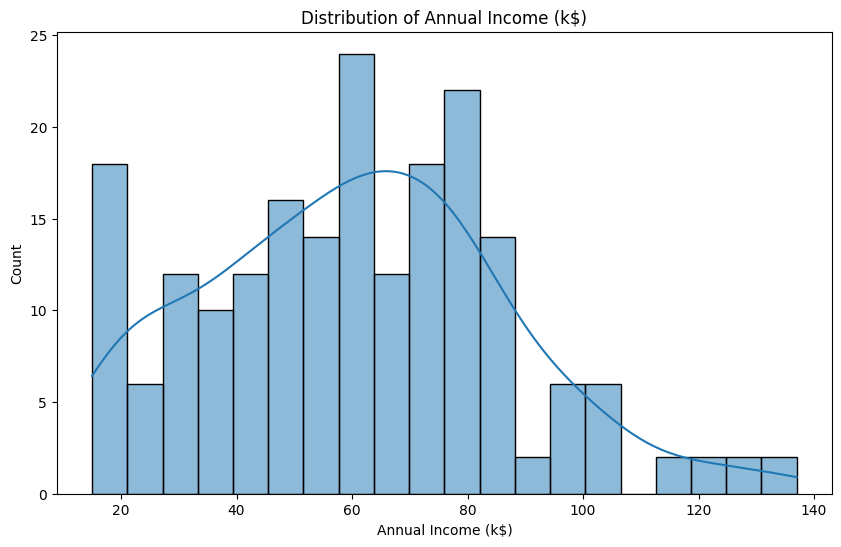

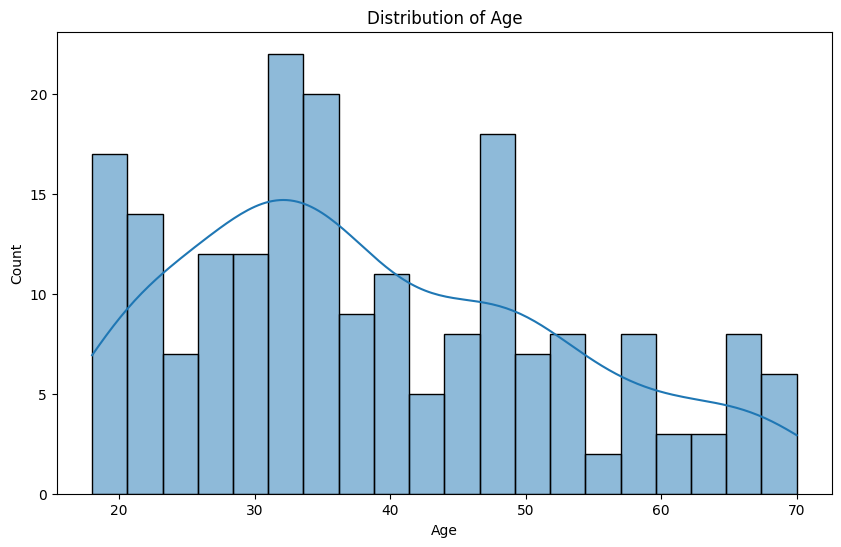

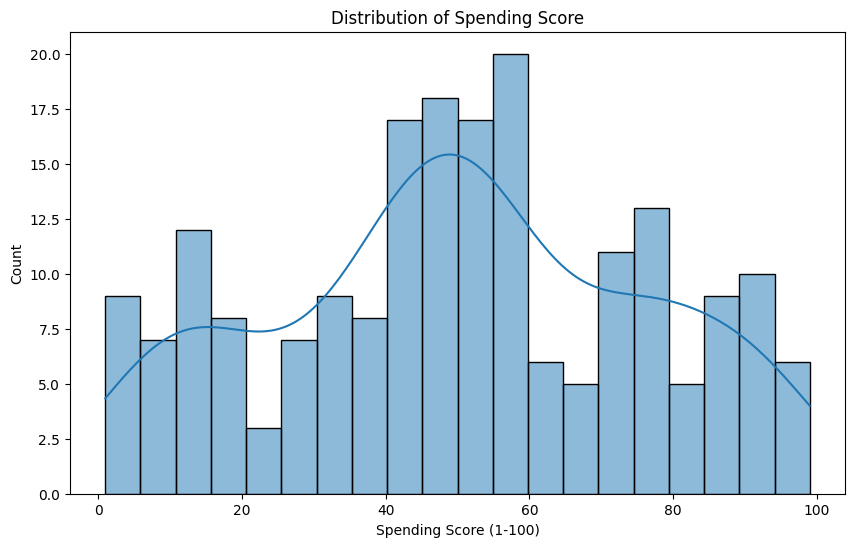

In [ ]:
# Annual Income distribution
plt.figure(figsize=(10,6))
sns.histplot(data['Annual Income (k$)'], kde=True, bins=20)
plt.title('Distribution of Annual Income (k$)')
plt.show()

# Age distribution
plt.figure(figsize=(10,6))
sns.histplot(data['Age'], kde=True, bins=20)
plt.title('Distribution of Age')
plt.show()

# Spending Score distribution
plt.figure(figsize=(10,6))
sns.histplot(data['Spending Score (1-100)'], kde=True, bins=20)
plt.title('Distribution of Spending Score')
plt.show()


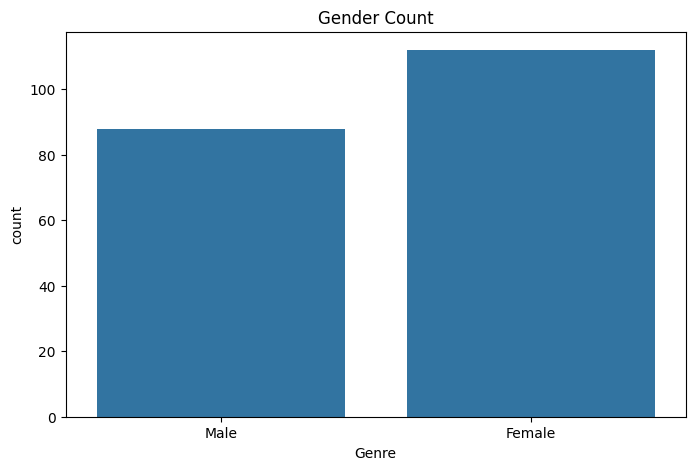

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Genre', data=data)
plt.title('Gender Count')
plt.show()


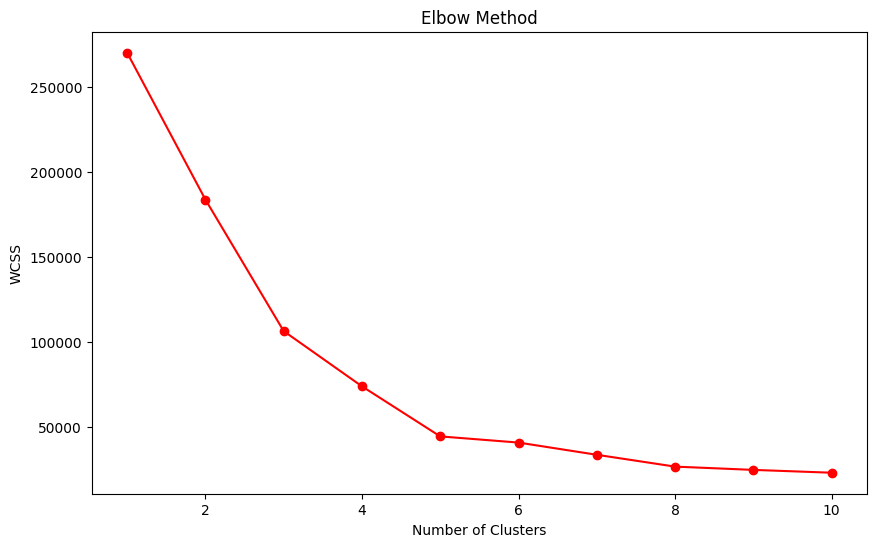

In [ ]:
# Features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# WCSS for 1-10 clusters
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i, init='k-means++', random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)

# Plot elbow curve
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker='o', color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


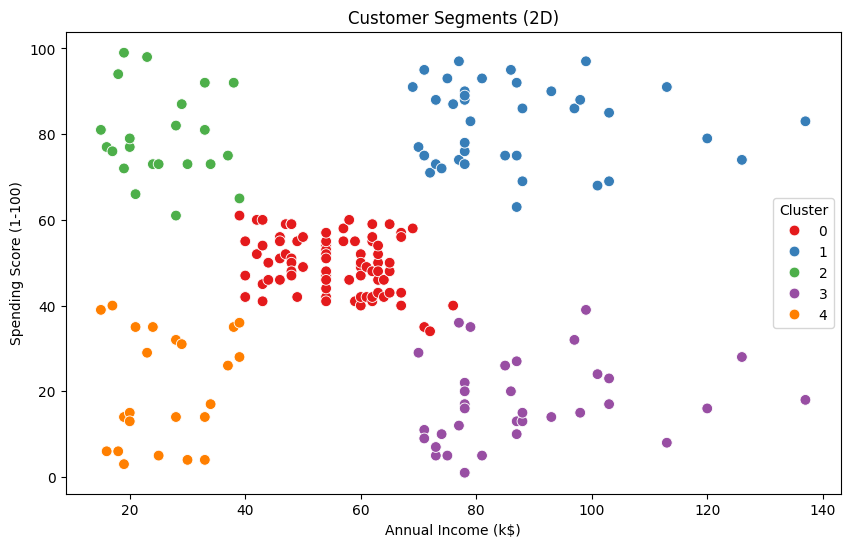

In [ ]:
# KMeans clustering with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# 2D Scatter plot of clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', palette='Set1', data=data, s=60)
plt.title('Customer Segments (2D)')
plt.show()


In [ ]:
# Display customers in each 2D cluster
for i in range(5):
    cust = data[data['Cluster']==i]  # Use 'Cluster', not 'Cluster3D'
    print(f'Cluster {i} - Number of Customers: {len(cust)}')
    print('Customer IDs:', cust['CustomerID'].values)
    print('-------------------------------------------')



Cluster 0 - Number of Customers: 81
Customer IDs: [ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 127 133 143]
-------------------------------------------
Cluster 1 - Number of Customers: 39
Customer IDs: [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]
-------------------------------------------
Cluster 2 - Number of Customers: 22
Customer IDs: [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]
-------------------------------------------
Cluster 3 - Number of Customers: 35
Customer IDs: [125 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 

In [ ]:
# Step 1: Calculate cluster centroids
cluster_summary = data.groupby('Cluster')[['Annual Income (k$)','Spending Score (1-100)']].mean()
cluster_summary


,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


In [ ]:
# Step 2: Assign descriptive labels based on income and spending
def label_cluster(row):
    income = row['Annual Income (k$)']
    spend = row['Spending Score (1-100)']

    if income >= 70 and spend >= 60:
        return "High Income, High Spending"
    elif income >= 70 and spend < 60:
        return "High Income, Low Spending"
    elif income < 40 and spend >= 60:
        return "Low Income, High Spending"
    elif income < 40 and spend < 60:
        return "Low Income, Low Spending"
    else:
        return "Average Income/Spending"

# Apply labels to each customer using cluster centroids
cluster_labels = {}
for i in range(5):
    centroid = cluster_summary.loc[i]
    label = label_cluster(centroid)
    cluster_labels[i] = label

# Create a new column with descriptive cluster labels
data['Cluster_Label'] = data['Cluster'].map(cluster_labels)


In [ ]:
# Step 3: Display each cluster with descriptive label
for i in range(5):
    cust = data[data['Cluster']==i]
    print(f"Cluster {i} - {cluster_labels[i]}")
    print(f"Number of Customers: {len(cust)}")
    print("Customer IDs:", cust['CustomerID'].values)
    print('-------------------------------------------')


Cluster 0 - Average Income/Spending
Number of Customers: 81
Customer IDs: [ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 127 133 143]
-------------------------------------------
Cluster 1 - High Income, High Spending
Number of Customers: 39
Customer IDs: [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]
-------------------------------------------
Cluster 2 - Low Income, High Spending
Number of Customers: 22
Customer IDs: [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]
-------------------------------------------
Cluster 3 - High Income, Low Spending
Number of Customers: 35
Customer IDs: [125 12